<a href="https://colab.research.google.com/github/amun83/Koscom-Financial-Data-Bootcamp/blob/master/FD104_Text_Mining_OilPrice_com_News_Articles_Step_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# II. Text Mining using: ~~NLTK~~, TextBlob, SpaCy

In [0]:
ON_COLAB  = True
DATA_PATH = ''

In [0]:
!pip install -q --upgrade pandas_datareader
!pip install -q --upgrade finance-datareader
!pip install -q --upgrade html5lib
!pip install -q --upgrade lxml
!pip install -q --upgrade seaborn
!pip install -q --upgrade gspread

In [0]:
# utilities
import datetime
import re
import csv
from IPython.display import display

# web scraping
import requests
import urllib.parse
from bs4 import BeautifulSoup as bs
import pandas_datareader as pdr
import FinanceDataReader as fdr

# Math/Stat
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
#import math

# Machine Learning
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM

# visualization
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
if ON_COLAB :
  from google.colab import drive
  drive.mount('/gdrive')
  DATA_PATH = '/gdrive/My Drive/oilprice.com/'

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


## Google Drive에서 데이터 꺼내기

In [27]:
df_news = pd.read_csv(DATA_PATH + 'oilprice.com_news_20181218.csv', names=['date', 'title', 'content', 'url'], parse_dates=['date'])  
  
'''
with open(DATA_PATH + 'oilprice.com_news_20181218.csv', 'r') as f:
  fr = csv.reader(f)
  news = [a for a in fr]

df_news = pd.DataFrame(news, columns=['date', 'title', 'content', 'url'], parse_dates=['date'])  # , 'author'
'''

df_news.tail(5)

,date,title,content,url
8647,2011-06-15,Rosneft Confident Oil Pricing Dispute With Chi...,China and Rosneft are disputing the price that...,Rosneft-Confident-Oil-Pricing-Dispute-With-Chi...
8648,2011-06-15,"Despite Fukushima, Taiwan to Build 4th Nuclear...",Taiwan’s government intends to press forward w...,Despite-Fukushima-Taiwan-To-Build-4th-Nuclear-...
8649,2011-06-15,Germany’s Nuclear Phase-Out Generates Lawsuits,"On 3 June, after meeting with the premiers of ...",Germanys-Nuclear-Phase-Out-Generates-Lawsuits....
8650,2011-06-15,Mozambique Moves Towards LNG Production,Western interest on Africa’s energy reserves i...,Mozambique-Moves-Towards-LNG-Production.html
8651,2011-06-15,Romania Posts 2011-2035 National Energy Strate...,"Romania’s Ministry of Economy, Trade and Busin...",Romania-Posts-2011-2035-National-Energy-Strate...


In [6]:
all_text = ' '.join(df_news['content'])
print(len(all_text))
print(all_text[-200:])

19220172
s, economic capacities, technologic and economic-financial trends, and energy efficiency, environmental protection and conformity with the EU energy policy.” By. Joao Peixe, Deputy Editor OilPrice.com


## Word Cloud (TextBlob)

In [7]:
!pip install -q --upgrade nltk
!pip install -q --upgrade textblob
!pip install -q --upgrade wordcloud

!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [0]:
import nltk
#nltk.download()  # type 'd' and 'brown'
from textblob import TextBlob, WordList
from collections import Counter
from wordcloud import WordCloud

In [0]:
blob = TextBlob(all_text)

nouns = [n for n, t in blob.tags if t == 'NN']
count = Counter(nouns)
tags = count.most_common(50)

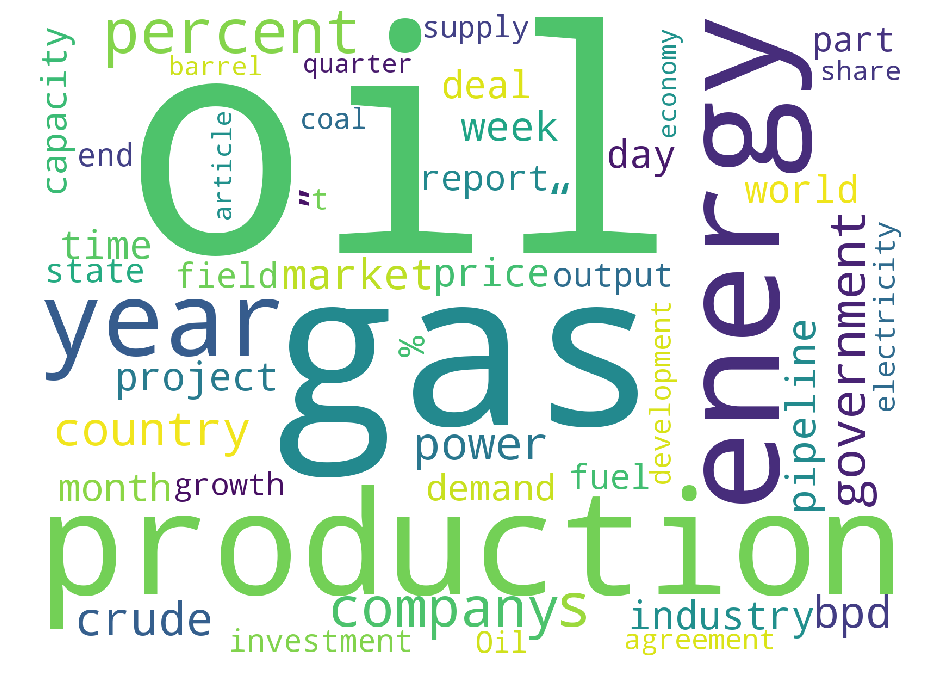

In [10]:
wc = WordCloud(background_color='white', width=1600, height=1200)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(16,12))
plt.axis('off')
plt.imshow(cloud)

## Noun Phrases
 * 명사구: 문장 속에서 명사처럼 주어·목적어·보어·전치사의 목적어로 쓰이는 구

In [0]:
nps = WordList([])

for t in df_news['content']:
  nps += TextBlob(t).noun_phrases

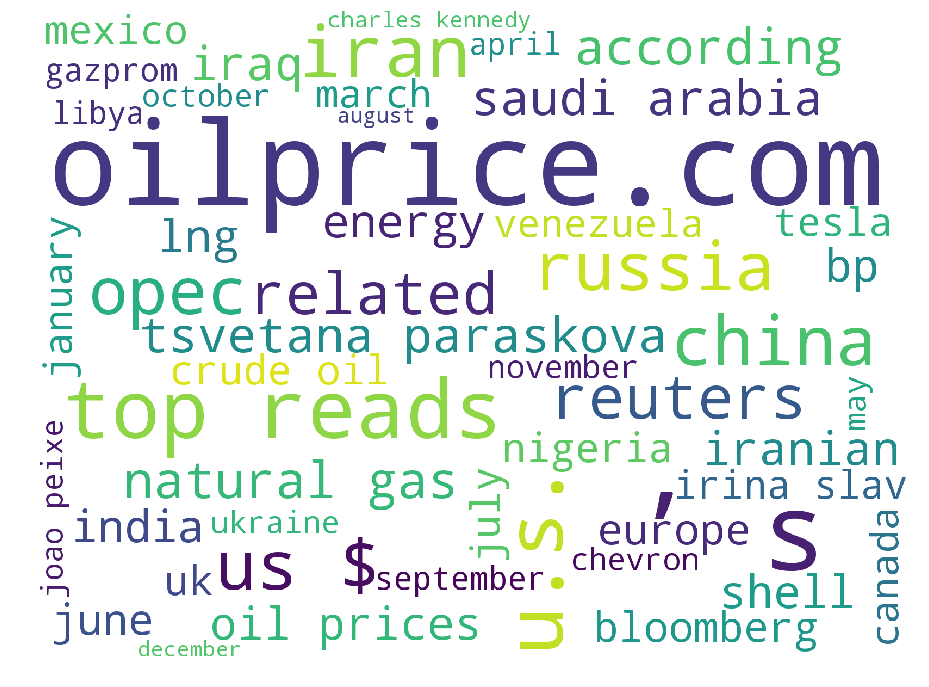

In [12]:
count = Counter(nps)
tags = count.most_common(50)

wc = WordCloud(background_color='white', width=1600, height=1200)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(16,12))
plt.axis('off')
plt.imshow(cloud)

## Sentiment Analysis (TexbBlob)
 * polarity
 * subjectivity

In [13]:
df_news['sentiment'] = df_news['content'].apply(lambda t: TextBlob(t).sentiment)
df_news[['polarity', 'subjectivity']] = df_news['sentiment'].apply(pd.Series)
df_news.drop(columns=['sentiment'])

df_news.head(10)

,date,title,content,url,sentiment,polarity,subjectivity
0,2018-Dec-17,France Extends State Guarantee For Total-Parti...,France is extending the state guarantees for t...,France-Extends-State-Guarantee-For-Total-Parti...,"(0.06807142857142857, 0.4021428571428572)",0.068071,0.402143
1,2018-Dec-17,Saudi Oil Minister Discusses Further Cooperati...,Saudi Arabia’s Energy Minister Khalid al-Falih...,Saudi-Oil-Minister-Discusses-Further-Cooperati...,"(0.04586363636363637, 0.5275454545454545)",0.045864,0.527545
2,2018-Dec-17,Pemex Boosts 2019 Budget 14% With Focus On Pro...,Mexico’s oil major Pemex will spend US$23 bill...,Pemex-Boosts-2019-Budget-14-With-Focus-On-Prod...,"(0.06960016835016836, 0.42771043771043765)",0.069600,0.427710
3,2018-Dec-17,Environment-Conscious Quebecois Buy More Gas G...,"A report from HEC Montreal, a business school ...",Environment-Conscious-Quebecois-Buy-More-Gas-G...,"(0.16061355311355313, 0.45706043956043957)",0.160614,0.457060
4,2018-Dec-17,Climate Change Conference Strikes Agreement On...,"The COP24 conference in Katowice, Poland, fina...",Climate-Change-Conference-Strikes-Agreement-On...,"(0.13131377551020407, 0.3724914965986394)",0.131314,0.372491
5,2018-Dec-14,Cuadrilla Halts Fracking Again Operations As T...,Cuadrilla has halted fracking operations for a...,Cuadrilla-Halts-Fracking-Again-Operations-As-T...,"(0.07103535353535353, 0.3903956228956229)",0.071035,0.390396
6,2018-Dec-14,Tesla Cuts Prices In China As Beijing Suspends...,Tesla has reduced the prices of its Model X an...,Tesla-Cuts-Prices-In-China-As-Beijing-Suspends...,"(0.13575396825396827, 0.38932539682539685)",0.135754,0.389325
7,2018-Dec-14,China’s Biggest U.S. Crude Oil Buyer To Resume...,"Unipec, the trading arm of Chinese state oil m...",Chinas-Biggest-US-Crude-Oil-Buyer-To-Resume-Pu...,"(-0.10030487804878048, 0.5036585365853659)",-0.100305,0.503659
8,2018-Dec-14,"Russia’s Rosneft Quits Iran, $30B Of Potential...",Russia’s largest oil producer Rosneft has deci...,Russias-Rosneft-Quits-Iran-30B-Of-Potential-Jo...,"(0.0907142857142857, 0.3545238095238096)",0.090714,0.354524
9,2018-Dec-14,"Operation ‘Sharpshooter’ Targets Energy, Defen...",A new global cyber threat campaign has recentl...,Operation-Sharpshooter-Targets-Energy-Defense-...,"(0.09429292929292929, 0.40921717171717165)",0.094293,0.409217


## Tutorial: Building a Text Classification System
 * https://textblob.readthedocs.io/en/dev/classifiers.html#classifiers

## spaCy
 * Named Entity Recognition
   * https://spacy.io/api/annotation#section-named-entities

In [14]:
!pip install -q --upgrade spacy

!python -m spacy download en
#!python -m spacy download custom_ner_model


    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [0]:
import spacy
from spacy import displacy

In [16]:
nlp = spacy.load('en_core_web_sm')

doc = nlp(df_news['content'][0])
displacy.render(doc, style='ent', jupyter=True)

In [0]:
!pip install -q --upgrade finance-datareader # for update

In [0]:
import FinanceDataReader as fdr

In [23]:
wti_futures = fdr.DataReader('CL', '2011-06-01')
wti_returns = wti_futures['Close'].pct_change()

wti_returns[:10]

Date
2011-06-01         NaN
2011-06-02    0.001097
2011-06-03   -0.001793
2011-06-06   -0.012073
2011-06-07    0.000808
2011-06-08    0.016652
2011-06-09    0.011813
2011-06-10   -0.025900
2011-06-13   -0.020042
2011-06-14    0.021274
Name: Close, dtype: float64

In [25]:
df_news[-5:]

,date,title,content,url,sentiment,polarity,subjectivity
8647,2011-Jun-15,Rosneft Confident Oil Pricing Dispute With Chi...,China and Rosneft are disputing the price that...,Rosneft-Confident-Oil-Pricing-Dispute-With-Chi...,"(0.033035714285714286, 0.3970238095238095)",0.033036,0.397024
8648,2011-Jun-15,"Despite Fukushima, Taiwan to Build 4th Nuclear...",Taiwan’s government intends to press forward w...,Despite-Fukushima-Taiwan-To-Build-4th-Nuclear-...,"(-0.08166666666666668, 0.2621428571428572)",-0.081667,0.262143
8649,2011-Jun-15,Germany’s Nuclear Phase-Out Generates Lawsuits,"On 3 June, after meeting with the premiers of ...",Germanys-Nuclear-Phase-Out-Generates-Lawsuits....,"(0.16685606060606062, 0.3263257575757576)",0.166856,0.326326
8650,2011-Jun-15,Mozambique Moves Towards LNG Production,Western interest on Africa’s energy reserves i...,Mozambique-Moves-Towards-LNG-Production.html,"(0.08769841269841269, 0.4615079365079365)",0.087698,0.461508
8651,2011-Jun-15,Romania Posts 2011-2035 National Energy Strate...,"Romania’s Ministry of Economy, Trade and Busin...",Romania-Posts-2011-2035-National-Energy-Strate...,"(0.07290552584670232, 0.3721033868092692)",0.072906,0.372103
